# Question 1

### What are the best ways to increase sales price for a home by 'flipping'?

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [21]:
from importlib import reload
import functions as fun

reload(fun)

<module 'functions' from 'C:\\Users\\kekay\\flatiron\\Module02\\Project\\dsc-mod-2-project-v2-1-onl01-dtsc-ft-041320\\functions.py'>

In [22]:
df = pd.read_csv('kc_cleaned_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,is_cust_build,years_since_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0,29.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,0.0


# Features with high correlation on price:

In [23]:
# Features that are controllable
feats = ['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms', 'bedrooms', 'sqft_basement', 'floors', 'condition']

In [24]:
corr = df[feats].corr()

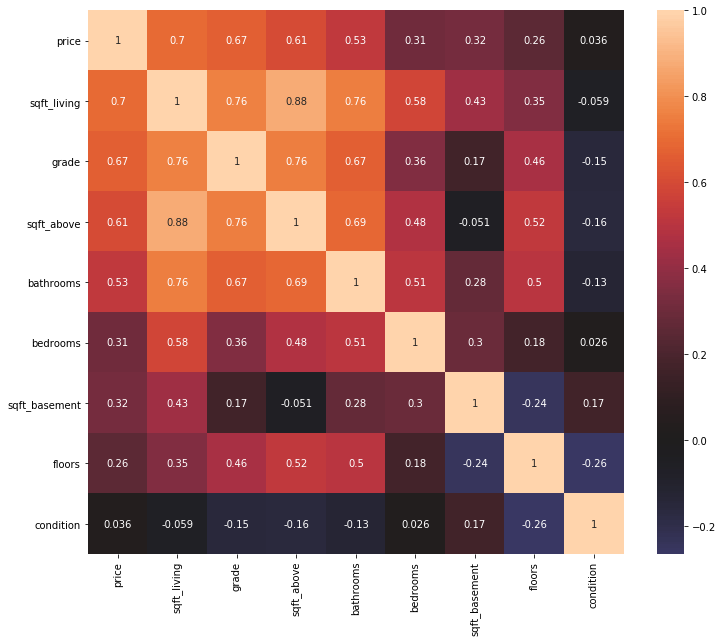

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, center=0, annot=True);

##### After narrowing down the variables to those that can be influenced, we are left with 7 aspects that have a relatively significant (above 0.25) impact on a home's sales price

- The highest impacts include:
    * Living area
    * House grade
    * Bathrooms
    * Bedrooms
    * Number of floors
    
Let's take a look to see if any of these increase sales price.

In [26]:
df_flip = df.drop(columns=['id', 'date', 'sqft_lot', 'waterfront', 'view',
                            'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 
                           'sqft_lot15', 'has_basement', 'is_cust_build', 'years_since_renovated'])
df_flip.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,1.0,3,7,1180,0.0
1,538000.0,3,2.25,2570,2.0,3,7,2170,400.0
2,180000.0,2,1.00,770,1.0,3,6,770,0.0
3,604000.0,4,3.00,1960,1.0,5,7,1050,910.0
4,510000.0,3,2.00,1680,1.0,3,8,1680,0.0


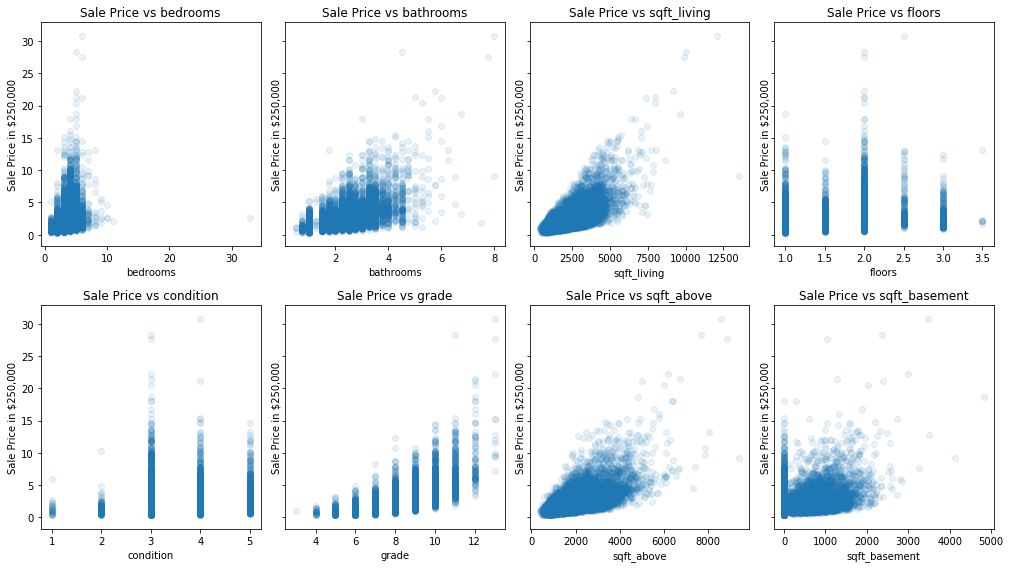

In [27]:
subset = df_flip.drop(columns=['price'])

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14,8), sharey=True)

for ax, column in zip(axes.flatten(), subset.columns):
    ax.scatter(subset[column], df['price'] / 250_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $250,000')

fig.tight_layout()

#### It does appear that our 7 features have a positive impact on price

# Dig deeper

In [28]:
values_floors = [1.0, 2.0, 3.0]
for val in values_floors:
    this_df = df_flip.loc[df_flip['floors']==val]
    print(round(np.mean(this_df['price']), 2))

442358.43
649185.64
583433.9


Assuming that adding a floor or basement would be too much hassel and too high of a cost for the average entreprenuer, let's remove those categories.

In [29]:
df_flip = df_flip.loc[df_flip['bedrooms']<10]
df_flip = df_flip.loc[df_flip['bathrooms']<6]
df_flip = df_flip.loc[df_flip['sqft_living']<10_000]
df_flip.drop(columns=['floors', 'sqft_basement', 'sqft_above'], inplace=True)

## Simple Linear Regression 

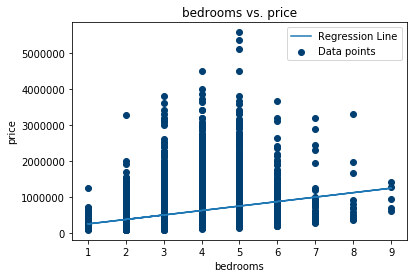

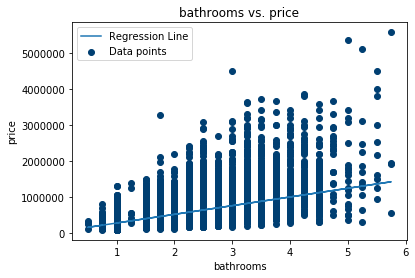

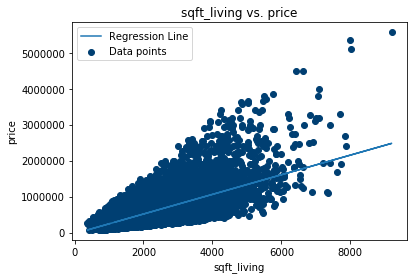

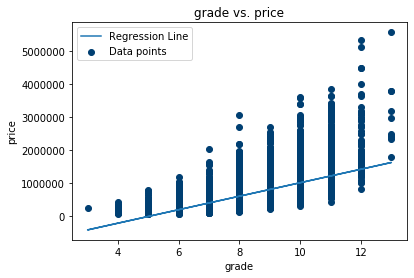

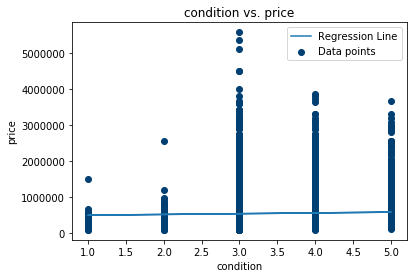

In [30]:
subset = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'condition']
fun.get_sim_lin_reg(df_flip, 'price', subset)

## This data is showing that it is most impactful on home price to increase bedrooms, bathrooms, living area, and house grade.

In [31]:
bedroom_values = [1,2,3,4,5,6,7,8,9]
bathroom_values = [1,2,3,4,5]
grade_values = [3,4,5,6,7,8,9,10,11,12,13]

In [32]:
print('Housing Price increase on average per bedroom:')
fun.get_mean_diff(bedroom_values, df_flip, 'bedrooms')

Housing Price increase on average per bedroom:
34682.48


In [33]:
print('Housing Price increase on average per bathroom:')
fun.get_mean_diff(bathroom_values, df_flip, 'bathrooms')

Housing Price increase on average per bathroom:
18064.05


In [34]:
print('Housing Price increase on average per grade:')
fun.get_mean_diff(grade_values, df_flip, 'grade')

Housing Price increase on average per grade:
55442.02


In [35]:
print('Housing Price increase on average 500 square feet of living area:')
mean_price = np.mean(df_flip['price'])

mean_sqft = np.mean(df_flip['sqft_living'])

print(round(((mean_price/mean_sqft) * 500),2))

Housing Price increase on average 500 square feet of living area:
129619.13


In [36]:
df_flip.to_csv('df_flip.csv', index=False)